In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

from src.nonlinear_approx import *
from src.linear_approx import approx_linear_func
from src.hyperparameter_search import find_best_eps

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# read dataset
linear_df = pd.read_csv('datasets/linear_function_data.txt',delim_whitespace=True, names=["x", "y"])
linear_data = np.array(linear_df,dtype=float)
nonlinear_df = pd.read_csv('datasets/nonlinear_function_data.txt',delim_whitespace=True, names=["x", "y"])
nonlinear_data = np.array(nonlinear_df,dtype=float)

# Part 1

[Text(0.5, 0, 'x'), Text(0, 0.5, 'f(x)')]

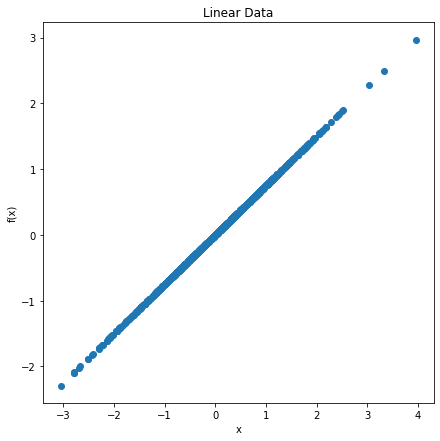

In [3]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot()
ax.scatter(linear_data[:,0],linear_data[:,1])
ax.set_title('Linear Data')
ax.update({'xlabel':'x', 'ylabel':'f(x)'})

[Text(0.5, 0, 'x'), Text(0, 0.5, 'f(x)')]

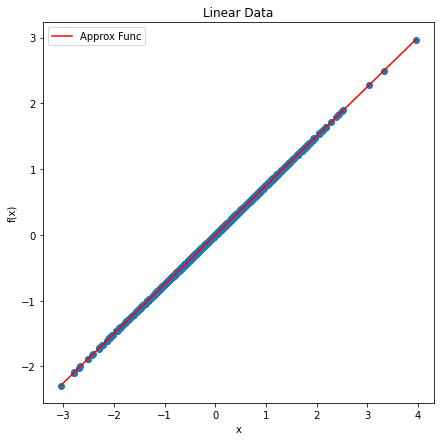

In [4]:
x = np.array([linear_data[:,0]]).T
fx = linear_data[:,1]
linear_func,A,res = approx_linear_func(x,fx)

x_new = np.array([np.linspace(np.min(x),np.max(x),1000)]).T
fx_predicted = linear_func(x_new)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot()
ax.scatter(linear_data[:,0],linear_data[:,1])
ax.plot(x_new,fx_predicted, c = 'r',label='Approx Func')
plt.legend()
ax.set_title('Linear Data')
ax.update({'xlabel':'x', 'ylabel':'f(x)'})

# Part 2

[Text(0.5, 0, 'x'), Text(0, 0.5, 'f(x)')]

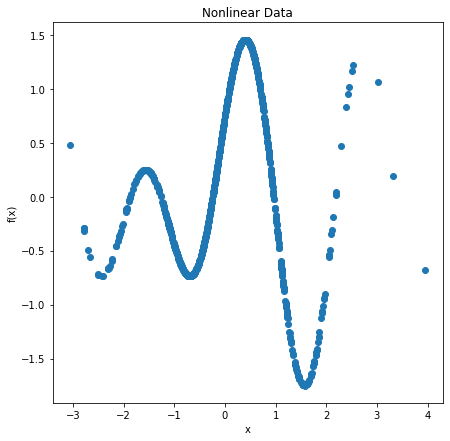

In [5]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot()
ax.scatter(nonlinear_data[:,0],nonlinear_data[:,1])
ax.set_title('Nonlinear Data')
ax.update({'xlabel':'x', 'ylabel':'f(x)'})

[Text(0.5, 0, 'x'), Text(0, 0.5, 'f(x)')]

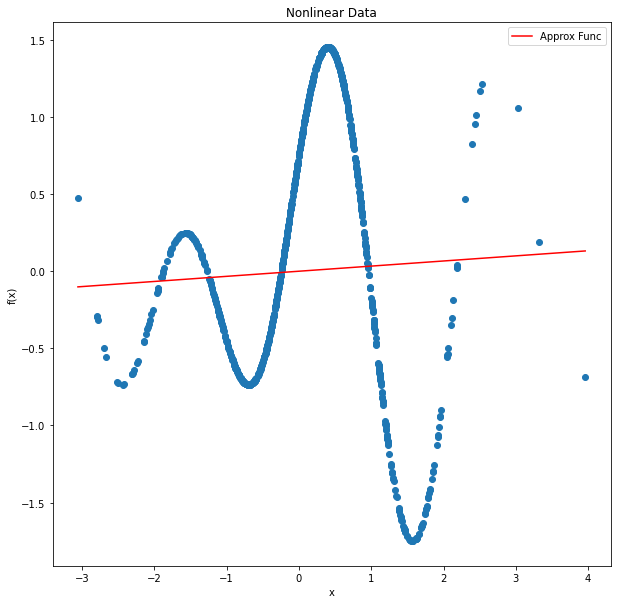

In [6]:
x = np.array([nonlinear_data[:,0]]).T
fx = nonlinear_data[:,1]
linear_func,A,res = approx_linear_func(x,fx)

x_new = np.array([np.linspace(np.min(x),np.max(x),1000)]).T
fx_predicted = linear_func(x_new)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
ax.scatter(nonlinear_data[:,0],nonlinear_data[:,1])
ax.plot(x_new,fx_predicted, c = 'r',label='Approx Func')
plt.legend()
ax.set_title('Nonlinear Data')
ax.update({'xlabel':'x', 'ylabel':'f(x)'})

# Part 3

[Text(0.5, 0, 'x'), Text(0, 0.5, 'f(x)')]

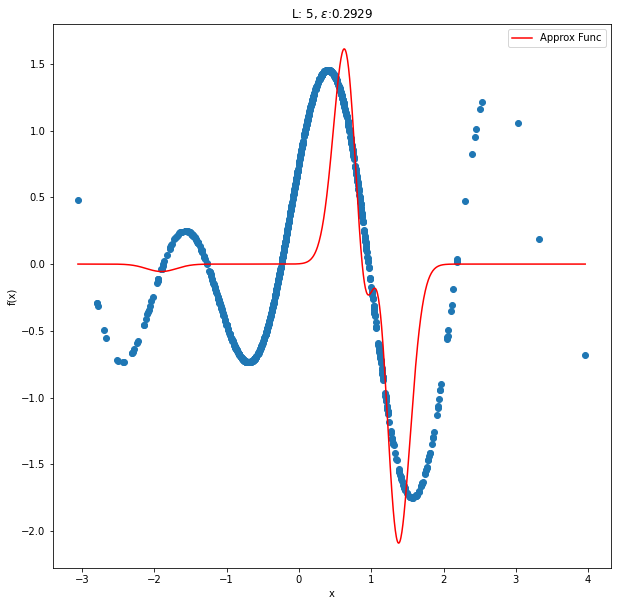

In [7]:
L = 5
e = 0.05

x = np.array([nonlinear_data[:,0]]).T
fx = nonlinear_data[:,1]
nonlinear_func,C,res,epsilon = approx_nonlinear_func(x,fx,L,e)

x_new = np.array([np.linspace(np.min(x),np.max(x),1000)]).T
fx_predicted = nonlinear_func(x_new)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
ax.plot(x_new,fx_predicted,color='r',label='Approx Func')
ax.scatter(nonlinear_data[:,0],nonlinear_data[:,1])
ax.set_title(r"L: {0}, $\epsilon$:{1}".format(L,np.round(epsilon,4)))
plt.legend()
ax.update({'xlabel':'x', 'ylabel':'f(x)'})

[Text(0.5, 0, 'x'), Text(0, 0.5, 'f(x)')]

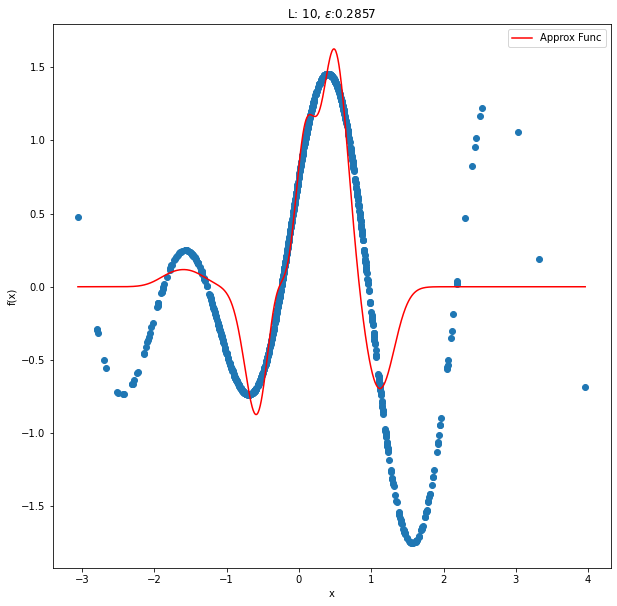

In [11]:
L = 10
e = 0.05

x = np.array([nonlinear_data[:,0]]).T
fx = nonlinear_data[:,1]
nonlinear_func,C,res,epsilon = approx_nonlinear_func(x,fx,L,e)

x_new = np.array([np.linspace(np.min(x),np.max(x),1000)]).T
fx_predicted = nonlinear_func(x_new)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
ax.plot(x_new,fx_predicted,color='r',label='Approx Func')
ax.scatter(nonlinear_data[:,0],nonlinear_data[:,1])
ax.set_title(r"L: {0}, $\epsilon$:{1}".format(L,np.round(epsilon,4)))
plt.legend()
ax.update({'xlabel':'x', 'ylabel':'f(x)'})

Minimum Residual is : 0.04061122163655197
At e =  0.48000000000000004


[Text(0.5, 0, 'x'), Text(0, 0.5, 'f(x)')]

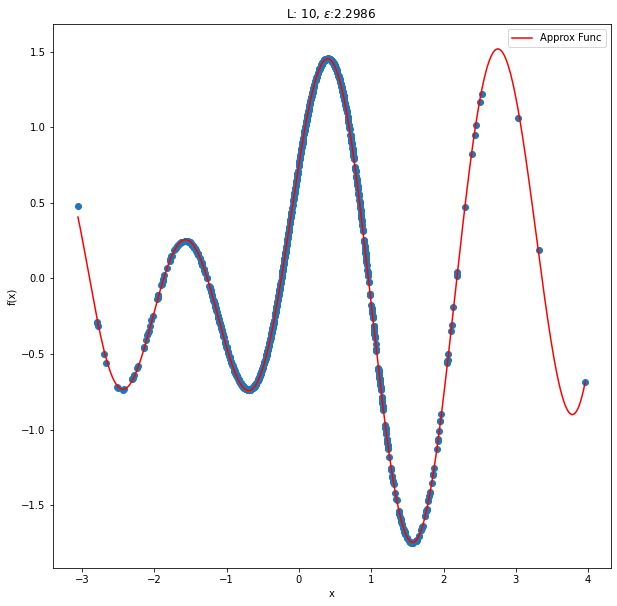

In [9]:
L = 10
e_list = np.linspace(0.01,0.5,50)

x = np.array([nonlinear_data[:,0]]).T
fx = nonlinear_data[:,1]


nonlinear_func, epsilon = find_best_eps(x,fx,L,e_list)

x_new = np.array([np.linspace(np.min(x),np.max(x),1000)]).T
fx_predicted = nonlinear_func(x_new)



fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
ax.plot(x_new,fx_predicted,color='r',label='Approx Func')
ax.scatter(nonlinear_data[:,0],nonlinear_data[:,1])
ax.set_title(r"L: {0}, $\epsilon$:{1}".format(L,np.round(epsilon,4)))
plt.legend()
ax.update({'xlabel':'x', 'ylabel':'f(x)'})

[Text(0.5, 0, 'x'), Text(0, 0.5, 'f(x)')]

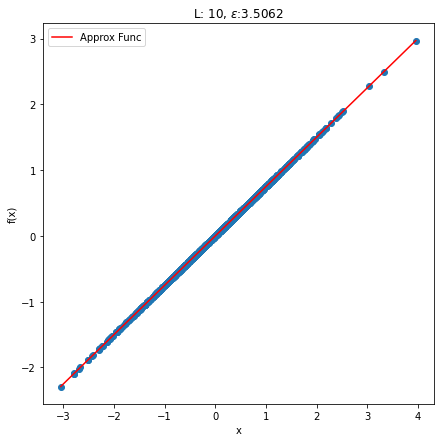

In [10]:
L = 10
e = 0.5

x = np.array([linear_data[:,0]]).T
fx = linear_data[:,1]
nonlinear_func,C,res,epsilon = approx_nonlinear_func(x,fx,L,e)

x_new = np.array([np.linspace(np.min(x),np.max(x),1000)]).T
fx_predicted = nonlinear_func(x_new)



fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot()
ax.scatter(linear_data[:,0],linear_data[:,1])
ax.plot(x_new,fx_predicted, c = 'r',label='Approx Func')
plt.legend()
ax.set_title(r"L: {0}, $\epsilon$:{1}".format(L,np.round(epsilon,4)))
ax.update({'xlabel':'x', 'ylabel':'f(x)'})